In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import MSTL

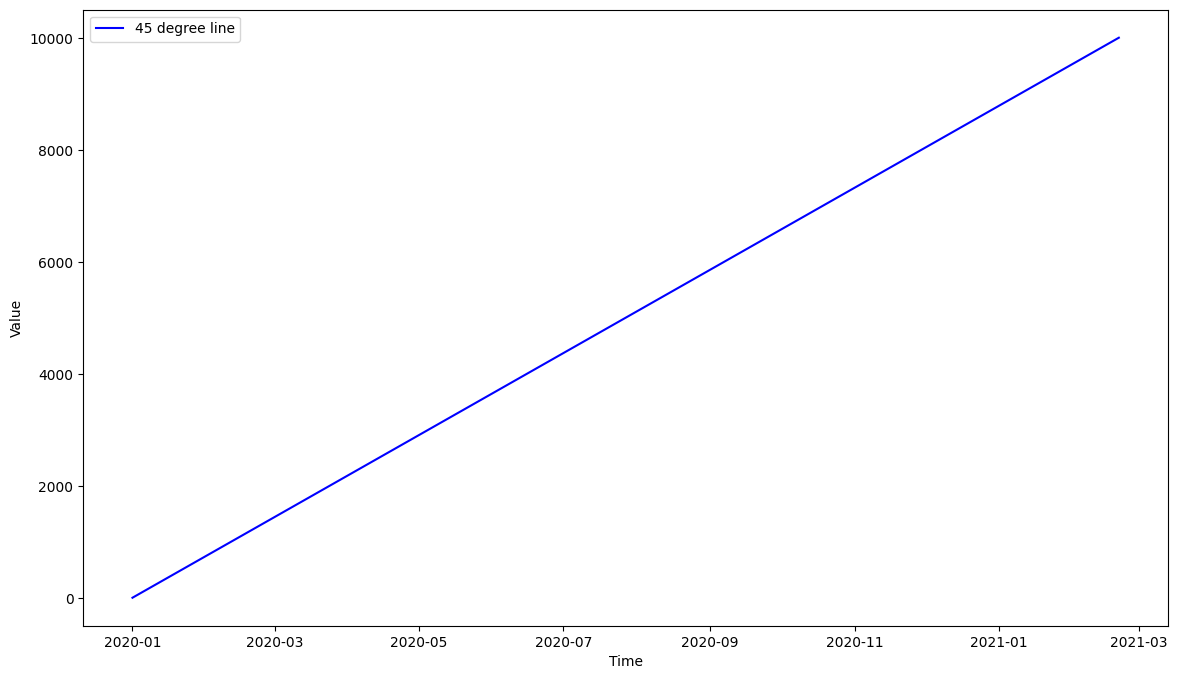

In [8]:
np.random.seed(42)

n_points = 10000  # Length of the time series
time_index = pd.date_range(start='2020-01-01', periods=n_points, freq='H')  # Hourly frequency

just_series = np.arange(1, 10001)

df = pd.DataFrame({'Line': just_series}, index=time_index)

plt.figure(figsize=(14, 8))
plt.plot(df['Line'], label='45 degree line', color='blue')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [9]:
mstl_3 = MSTL(df["Line"], periods=(24, 24 * 7), stl_kwargs={"seasonal_deg": 0})
res_3 = mstl_3.fit() 

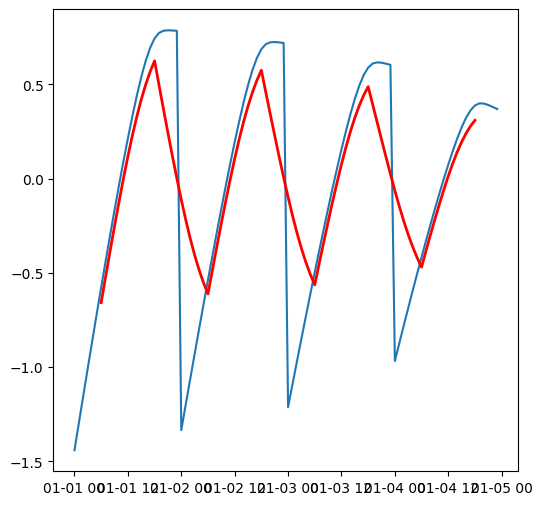

In [10]:
# Found seasonal component!
fig = plt.figure(figsize=(6, 6))
plt.plot(res_3.seasonal.iloc[:24*4, 0])
plt.plot(res_3.seasonal.iloc[:24*4, 0].rolling(window=12, center=True).mean(), color='red', linewidth=2, label="Smoothed")

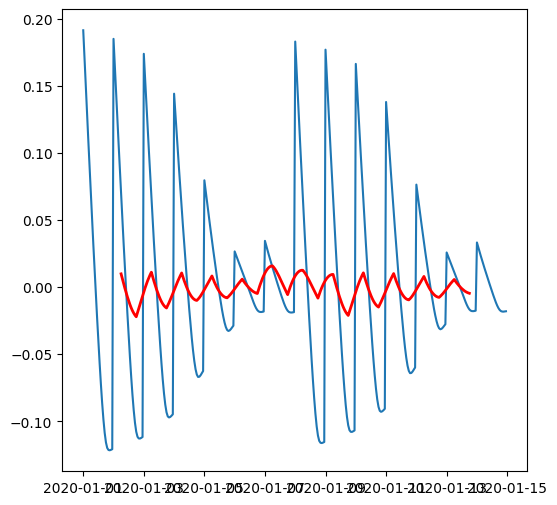

In [6]:
# Also found seasonal component!
fig = plt.figure(figsize=(6, 6))
plt.plot(res_3.seasonal.iloc[:24*14, 1])
plt.plot(res_3.seasonal.iloc[:24*14, 1].rolling(window=60, center=True).mean(), color='red', linewidth=2, label="Smoothed")

In [ ]:
np.std(res_3.seasonal.iloc[:, 1])

0.02758028495278294

In [ ]:
np.std(res_3.seasonal.iloc[:, 0])

0.08947812071218905

In [ ]:
# Variance of residuals
np.std(res_3.resid)

0.07604913790682537